In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

#List 6

Read the description of the q-voter model with independence in Mapping
the q-voter model: From a single chain to complex networks by Jędrzejewski et al (https://arxiv.org/abs/1501.05091):

### Implement the model with NN influence group.

In [2]:
def spinson_action(g, p, q, opinions):
    nodes = list(g.nodes())
    nodes_nr = len(nodes)
    spinson = random.choice(nodes) # choose random spinson
    
    if random.random()<p: # independence with probability p
        if random.random()<0.5: # changes opinion with probability 0.5
            opinions[spinson] = -opinions[spinson] 
    else: # confirmity with probability 1-p
        if len(list(g.neighbors(spinson)))<q:
            q_panel = list(g.neighbors(spinson)) # if nr of neighbors is less than q take all nbrs
        else:
            q_panel = random.sample(list(g.neighbors(spinson)), k=q) # chose q neighbors to ask for opinion
        q_opinions = [opinions[j] for j in q_panel] # create a list of neighbors opinions 
        q_first = int(q_opinions[0])
        if len(set(q_opinions)) == 1: # if neighbors in q-panel have same opinions
            opinions[spinson] = q_first # spinson has the same opinion as q-panel
            
    magnetization = sum(opinions)/nodes_nr
    
    return magnetization

### Simulate the model with N = 100 agents, q = 3 and 4, and the independence factor p ranging from 0.0 to 0.5 with step 0.02. Use the following networks as the underlying topology of social interactions: complete graph, BA(100,4), WS(100,4,0.01), WS(100,4,0.2). Finish the simulations after 1000 Monte Carlo steps.

In [4]:
def graph(g, N):
    if g == 'CT':
        return nx.complete_graph(N)
    elif g == 'BA':
        return nx.barabasi_albert_graph(N, 4)
    elif g == 'WS1':
        return nx.watts_strogatz_graph(N, 4, 0.01)
    elif g == 'WS2':
        return nx.watts_strogatz_graph(N, 4, 0.2)

In [3]:
def repeat(g, p, q, N, MC):
    G = graph(g,N)
    opinions = np.ones(N) 
    time = list([1]) 
    
    for m in range(MC-1):
        for _ in range(N): 
            end_mc_step = spinson_action(G,p,q,opinions)   
        time.append(end_mc_step)
        
    return time

In [5]:
def independent_runs(g, p, q, N, MC, steps):
    result = np.zeros(MC)
    final_magn = []
    
    for _ in range(steps):
        step = repeat(g, p, q, N, MC)
        final_magn.append(step[-1])
        result = result + step
    avg_magnetization = result/steps
    final_magn = sum(final_magn)/steps
    
    return avg_magnetization, final_magn

### Plot the average final magnetization as a function of independence factor p for


* q = 4 and different network topologies (one plot)

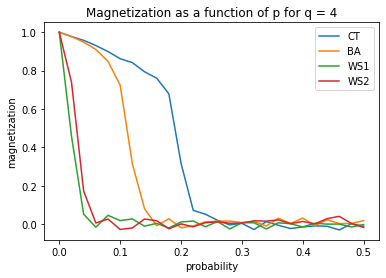

In [7]:
q = 4
N =  100
MC =  500
steps = 100
probabilities = np.arange(0.0, 0.52, 0.02)
    
for g in ['CT', 'BA', 'WS1', 'WS2']:
  final_mag = []
  for p in probabilities:
    avg, final = independent_runs(g, p, q, N, MC, steps)
    final_mag.append(final)
  plt.plot(probabilities, final_mag)
        
plt.xlabel('probability')
plt.ylabel('magnetization')
plt.legend(['CT', 'BA', 'WS1', 'WS2'])
plt.title(f'Magnetization as a function of p for q = 4')
plt.show()

Watts-Strogatz model converges with small value of  p , after that we get Barabasi-Albert and at the end complete graph. It's probably due to characteristics of model, i.e. Watts-Strogatz model has short average path lengths and high clustering which helps to spread new opinions because it's easy to transfer opinion from one part of network to other and convice other people in panels due to high clustering; Barabasi-Albert which is not fully connected and it's easier to convice some part of networks and make opinion not unanimious; complete graph which has many connections and at the begining it's hard to convice anybody and with small  p  we don't have enough independent spinsons.